In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets

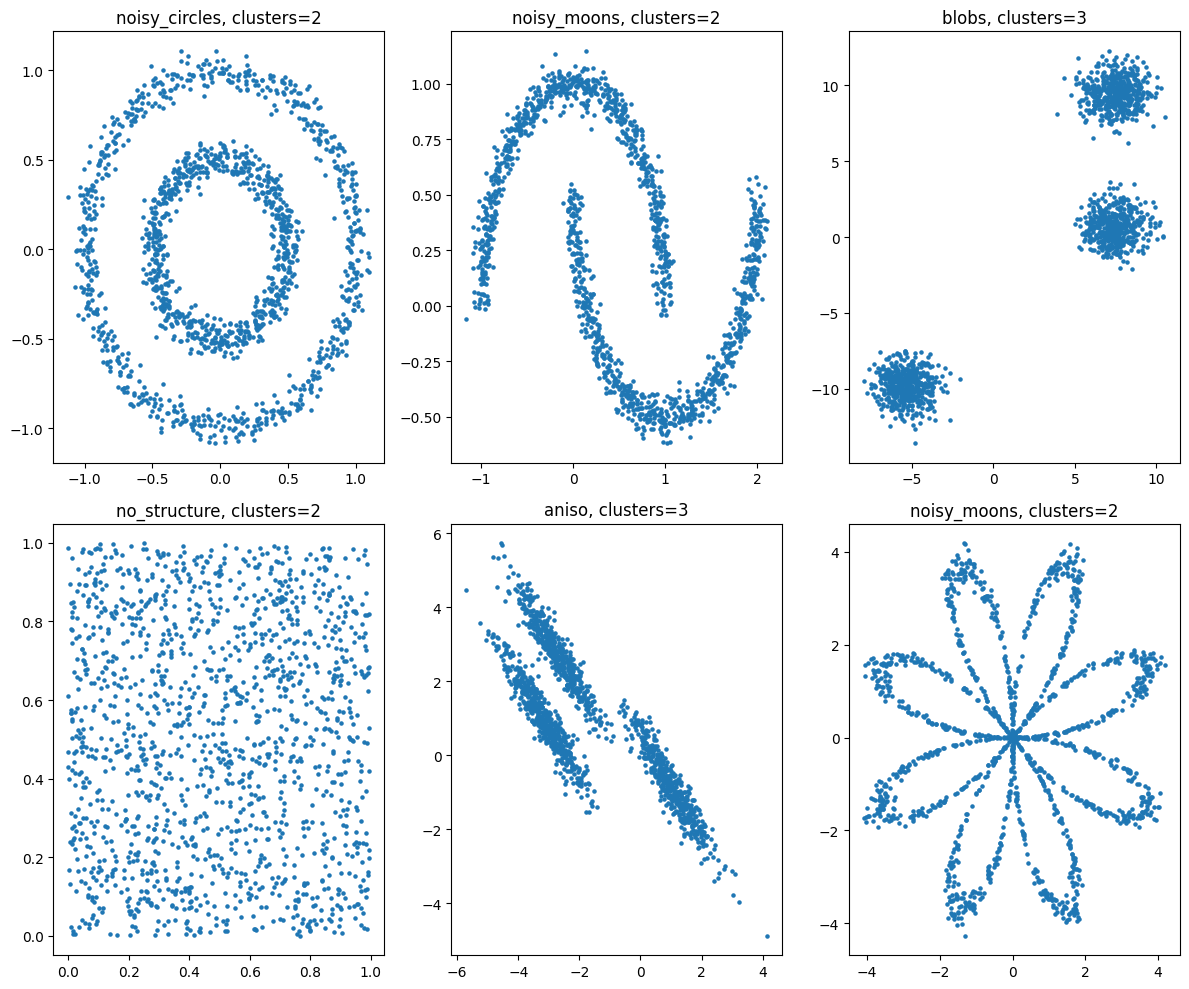

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 1500 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y
    # Parameters
n_samples = 1500

# Generate datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = (np.random.rand(n_samples, 2), None)

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# Flower data
Fw_x, Fw_y = load_planar_dataset()
name = 'flower'
Fw_x = Fw_x.T
fig, axs = plt.subplots(2, 3, figsize=(12, 10))

axs[0][0].scatter(noisy_circles[0][:, 0], noisy_circles[0][:, 1],  s=5)
axs[0][0].set_title("noisy_circles, clusters=2")

axs[0][1].scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1],  s=5)
axs[0][1].set_title("noisy_moons, clusters=2")

axs[0][2].scatter(blobs[0][:, 0], blobs[0][:, 1],  s=5)
axs[0][2].set_title("blobs, clusters=3")

axs[1][0].scatter(no_structure[0][:, 0], no_structure[0][:, 1],  s=5)
axs[1][0].set_title("no_structure, clusters=2")

axs[1][1].scatter(aniso[0][:, 0], aniso[0][:, 1],  s=5)
axs[1][1].set_title("aniso, clusters=3")

axs[1][2].scatter(Fw_x[:, 0], Fw_x[:, 1],  s=5)
axs[1][2].set_title("noisy_moons, clusters=2")


plt.tight_layout()
plt.show()

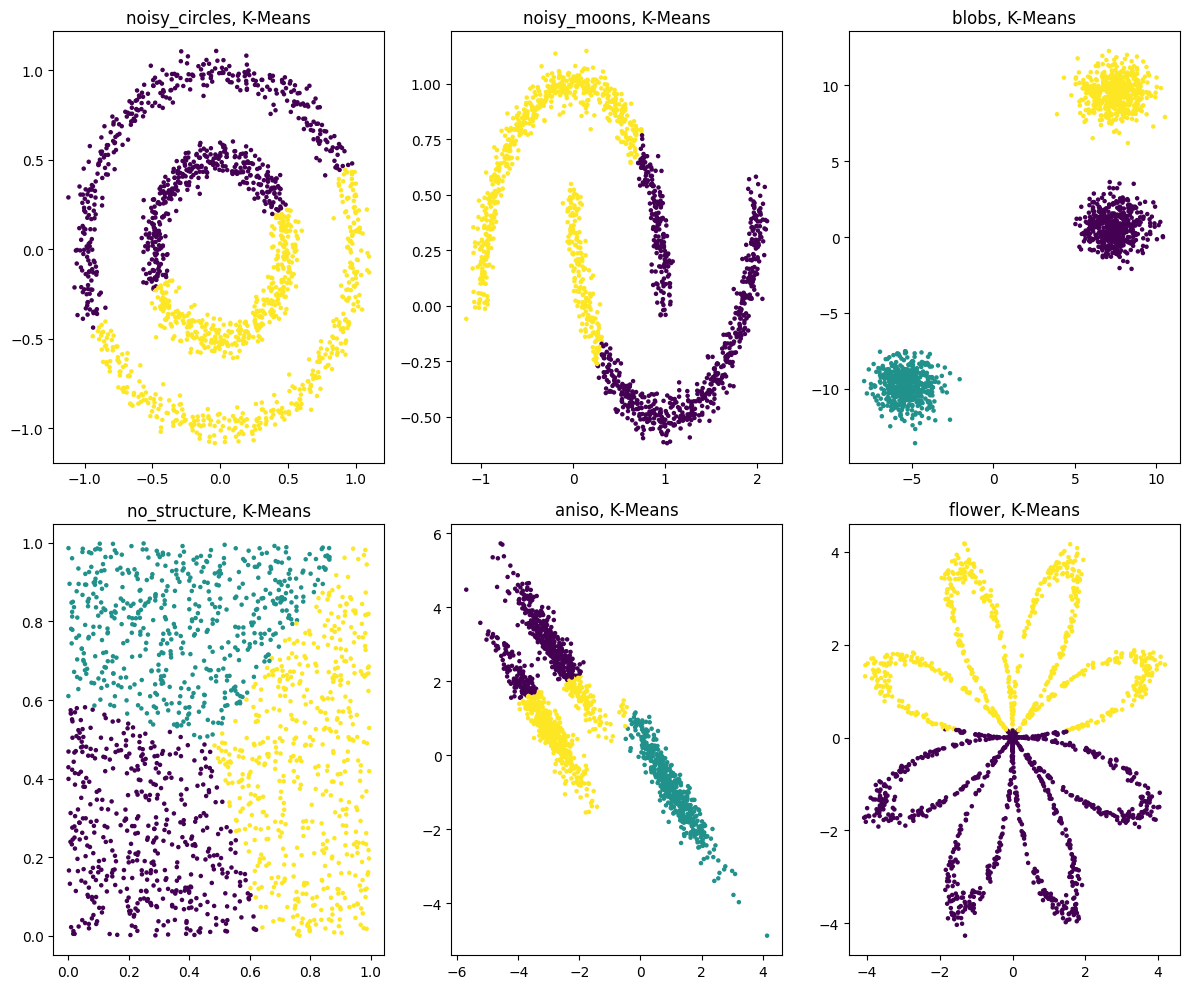

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset configurations
datasets = {
    "noisy_circles": noisy_circles,
    "noisy_moons": noisy_moons,
    "blobs": blobs,
    "no_structure": no_structure,
    "aniso": aniso,
    "flower": (Fw_x, Fw_y)
}

fig, axs = plt.subplots(2, 3, figsize=(12, 10))
for i, (name, (X, _)) in enumerate(datasets.items()):
    # Apply K-Means
    n_clusters = 2 if name in ['noisy_circles', 'noisy_moons', 'flower'] else 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(X)

    # Plot results
    row, col = divmod(i, 3)
    axs[row][col].scatter(X[:, 0], X[:, 1], c=y_pred, s=5, cmap='viridis')
    axs[row][col].set_title(f"{name}, K-Means")

plt.tight_layout()
plt.show()


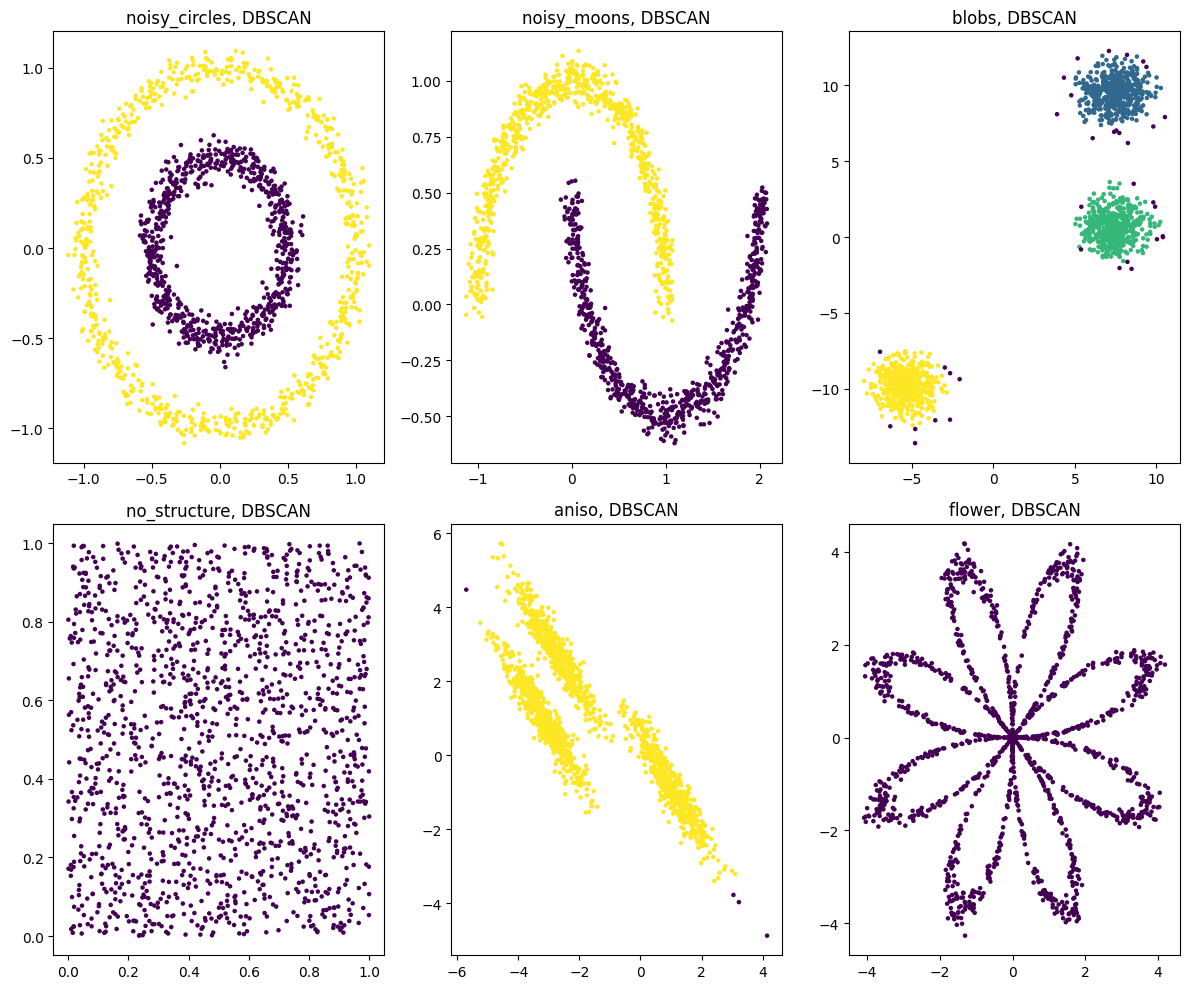

In [ ]:
from sklearn.cluster import DBSCAN

fig, axs = plt.subplots(2, 3, figsize=(12, 10))
for i, (name, (X, _)) in enumerate(datasets.items()):
    # Apply DBSCAN
    eps = 0.2 if name in ['noisy_circles', 'noisy_moons'] else 0.5
    dbscan = DBSCAN(eps=eps, min_samples=5)
    y_pred = dbscan.fit_predict(X)

    # Plot results
    row, col = divmod(i, 3)
    axs[row][col].scatter(X[:, 0], X[:, 1], c=y_pred, s=5, cmap='viridis')
    axs[row][col].set_title(f"{name}, DBSCAN")

plt.tight_layout()
plt.show()


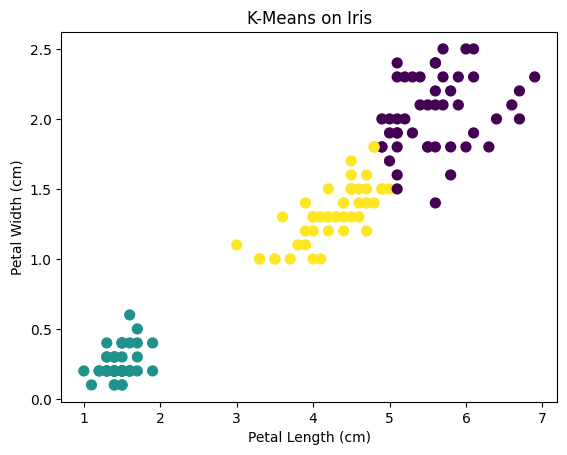

In [ ]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X_iris = iris.data[:, 2:4]  # petal length and petal width

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_iris)

# Plot results
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title("K-Means on Iris")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


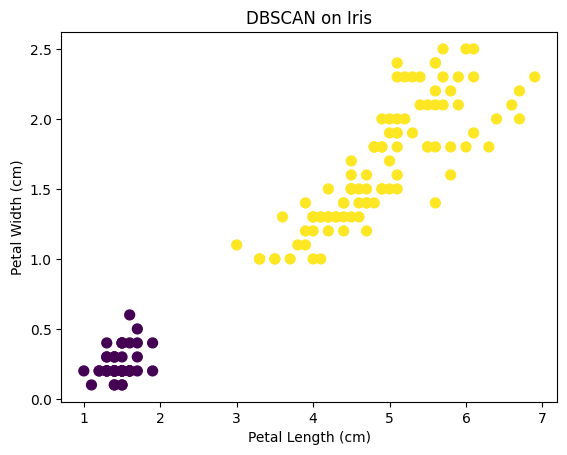

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred = dbscan.fit_predict(X_iris)

# Plot results
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred, s=50, cmap='viridis')
plt.title("DBSCAN on Iris")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()
